In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  
matplotlib.rcParams['figure.figsize'] = [10., 5.]
matplotlib.rcParams["font.size"] = "16"
matplotlib.rcParams["lines.linewidth"] = "3"
matplotlib.rcParams["axes.grid"] = True

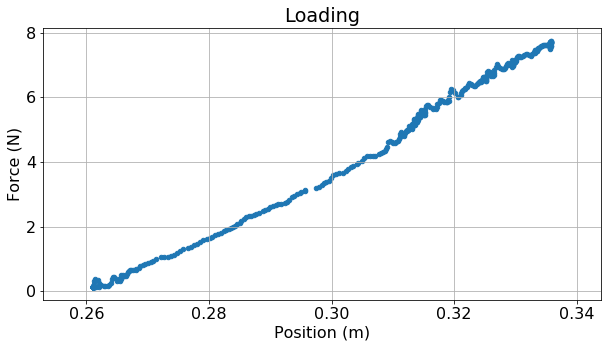

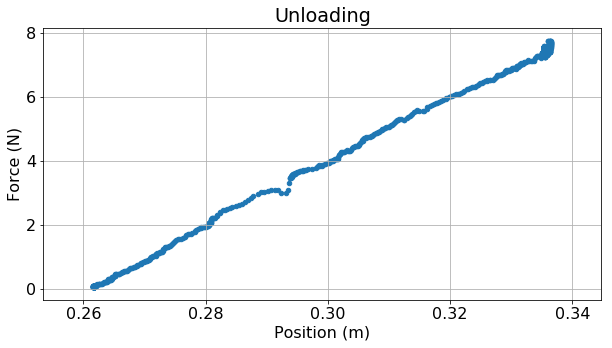

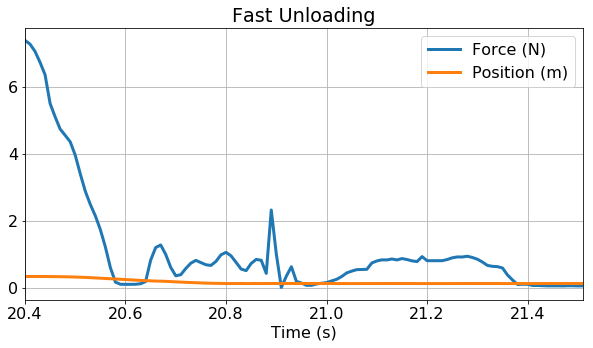

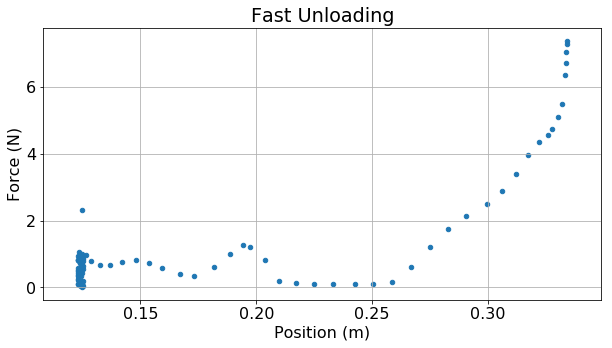

In [52]:
df = pd.read_csv('loading_unloading.csv')
df = df.abs()

df_loading = df[:df['Force (N)'].argmax()]
df_unloading = df[df['Force (N)'].argmax():]

df_loading.plot.scatter(title='Loading', x='Position (m)', y='Force (N)')
df_unloading.plot.scatter(title='Unloading', x='Position (m)', y='Force (N)')

df = pd.read_csv('fast_unloading.csv')
df = df.abs()

df_fastunloading = df[2040:2152]
df_fastunloading.plot(title='Fast Unloading', x='Time (s)')
df_fastunloading.plot.scatter(title='Fast Unloading', x='Position (m)', y='Force (N)')

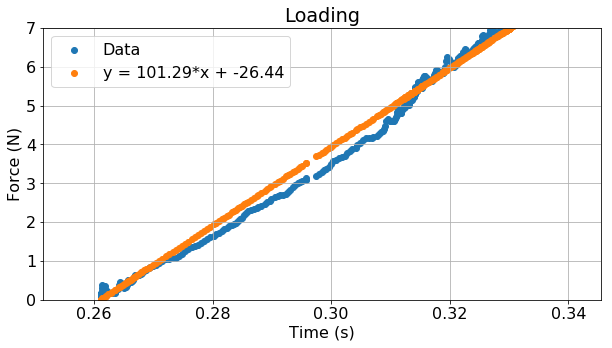

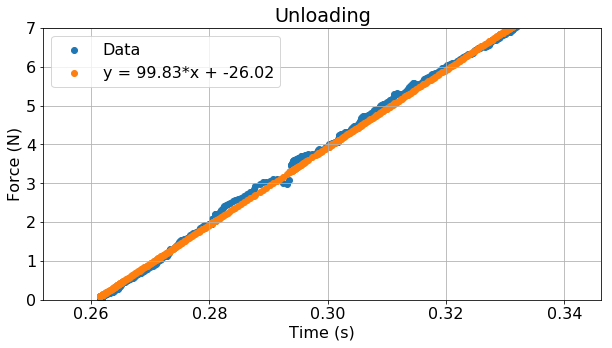

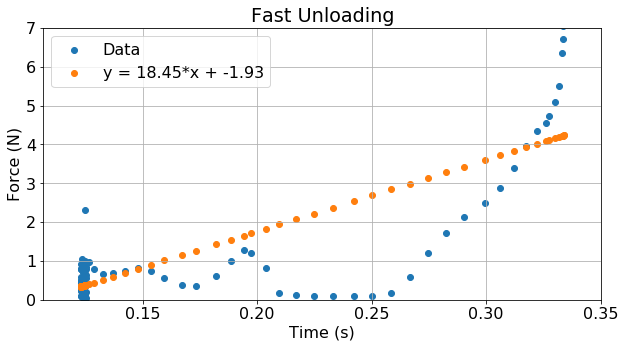

In [55]:
def scatter_plot(key, x_vals, y_vals):
    reg = linear_model.LinearRegression()
    reg.fit(x_vals.reshape(x_vals.shape[0], 1), y_vals.reshape(y_vals.shape[0], 1))

    m = reg.coef_[0]
    b = reg.intercept_

    def linear_function(x, m, b):
        return m*x + b

    linear_vals = np.zeros((x_vals.shape[0]))
    for x_idx, x in enumerate(x_vals):
        linear_vals[x_idx] = linear_function(x, m, b)

    plt.scatter(x_vals, y_vals)
    plt.scatter(x_vals, linear_vals)
    axes = plt.gca()
    axes.set_ylim([0, 7])
    plt.ylabel('Force (N)')
    plt.xlabel('Position (m)')

    legend_data = "Data"
    legend_fit = "y = %.2f*x + %.2f" % (m, b)
    plt.legend([legend_data, legend_fit])
    title = key
    plt.title(title)
    plt.savefig(title)
    plt.show()
    
    
ndarray_loading = df_loading.as_matrix(columns=['Position (m)', 'Force (N)'])

x_vals = ndarray_loading[:,0]
y_vals = ndarray_loading[:,1]

scatter_plot('Loading', x_vals, y_vals)

ndarray_unloading = df_unloading.as_matrix(columns=['Position (m)', 'Force (N)'])

x_vals = ndarray_unloading[:,0]
y_vals = ndarray_unloading[:,1]

scatter_plot('Unloading', x_vals, y_vals)

ndarray_fastunloading = df_fastunloading.as_matrix(columns=['Position (m)', 'Force (N)'])

x_vals = ndarray_fastunloading[:,0]
y_vals = ndarray_fastunloading[:,1]

scatter_plot('Fast Unloading', x_vals, y_vals)